In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn import metrics
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
price = pd.read_csv('flight_price.csv')
price.head()

,Unnamed: 0,Airline Name,Source,Departure Time,Destination,Arrival Time,Stops,Duration,Flight Price
0,0,Go First,New Delhi,15:00,Mumbai,17:00,Non Stop,2h 00m,"7,320"
1,1,Air India,New Delhi,18:00,Mumbai,20:00,Non Stop,2h 00m,"7,320"
2,2,Air India,New Delhi,07:00,Mumbai,09:05,Non Stop,2h 05m,"7,320"
3,3,Air Asia,New Delhi,04:25,Mumbai,06:35,Non Stop,2h 10m,"7,320"
4,4,Vistara,New Delhi,05:45,Mumbai,07:55,Non Stop,2h 10m,"7,320"


In [3]:
price.drop(['Unnamed: 0'], axis= 1, inplace= True)

In [4]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline Name    1568 non-null   object
 1   Source          1568 non-null   object
 2   Departure Time  1568 non-null   object
 3   Destination     1568 non-null   object
 4   Arrival Time    1568 non-null   object
 5   Stops           1568 non-null   object
 6   Duration        1568 non-null   object
 7   Flight Price    1568 non-null   object
dtypes: object(8)
memory usage: 98.1+ KB


In [13]:
price['Flight Price'].unique()

array(['7,320', '7,530', '7,845', '8,160', '8,266', '8,580', '8,895',
       '9,263', '9,463', '9,683', '9,840', '10,680', '10,995', '11,100',
       '11,153', '11,402', '11,520', '11,585', '11,730', '11,940',
       '12,098', '12,298', '12,360', '12,570', '13,095', '13,200',
       '13,305', '13,401', '13,410', '13,821', '13,830', '13,935',
       '14,002', '14,040', '14,145', '14,565', '14,670', '14,933',
       '14,985', '15,090', '15,195', '15,300', '15,343', '15,405',
       '15,510', '15,720', '15,930', '16,350', '17,295', '18,855',
       '20,341', '21,075', '22,319', '8,423', '8,764', '8,790', '9,368',
       '9,420', '10,050', '11,179', '11,353', '12,045', '12,203',
       '12,518', '12,886', '12,931', '12,990', '13,515', '13,579',
       '13,594', '13,620', '13,725', '13,751', '13,778', '14,250',
       '14,618', '14,775', '14,801', '14,880', '15,825', '16,193',
       '16,665', '16,770', '16,928', '17,425', '17,662', '17,925',
       '17,978', '18,030', '18,417', '18,942', '

In [14]:
price['Flight Price'] = price['Flight Price'].str.replace(',','')

In [16]:
price['Flight Price'] = pd.to_numeric(price['Flight Price'])

In [17]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline Name    1568 non-null   object
 1   Source          1568 non-null   object
 2   Departure Time  1568 non-null   object
 3   Destination     1568 non-null   object
 4   Arrival Time    1568 non-null   object
 5   Stops           1568 non-null   object
 6   Duration        1568 non-null   object
 7   Flight Price    1568 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 98.1+ KB


In [18]:
price.shape

(1568, 8)

In [19]:
price.describe()

,Flight Price
count,1568.000000
mean,13182.484694
std,5353.256982
min,5102.000000
25%,8160.000000
50%,12931.000000
75%,16150.500000
max,34128.000000


In [20]:
price.isnull().sum()

Airline Name      0
Source            0
Departure Time    0
Destination       0
Arrival Time      0
Stops             0
Duration          0
Flight Price      0
dtype: int64

1. Airline Name

In [21]:
price['Airline Name'].unique()

array(['Go First', 'Air India', 'Air Asia', 'Vistara', 'IndiGo',
       'SpiceJet'], dtype=object)

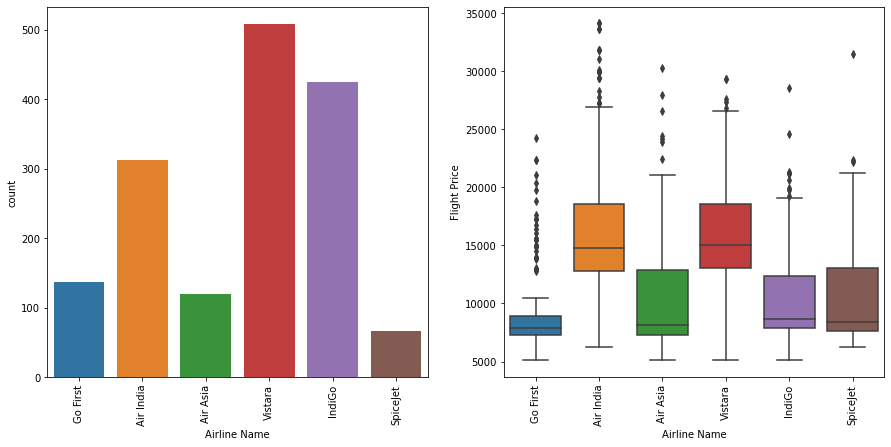

In [22]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(price['Airline Name'])
plt.xlabel('Airline Name')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'Airline Name', y= 'Flight Price', data= price)
plt.xlabel('Airline Name')
plt.xticks(rotation= 90)
plt.ylabel('Flight Price')
plt.show()

2. Source

In [23]:
price['Source'].unique()

array(['New Delhi', 'Mumbai', 'Kolkata'], dtype=object)

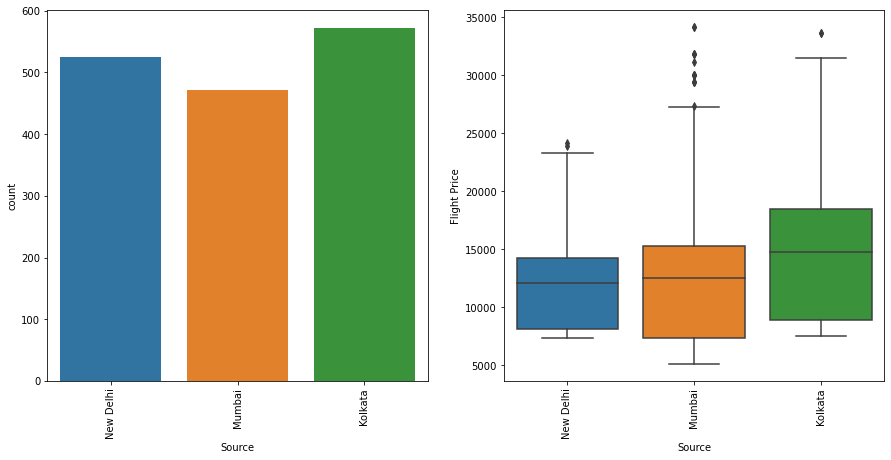

In [24]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(price['Source'])
plt.xlabel('Source')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'Source', y= 'Flight Price', data= price)
plt.xlabel('Source')
plt.xticks(rotation= 90)
plt.ylabel('Flight Price')
plt.show()

3. Departure Time

In [25]:
price['Departure Time'].unique()

array(['15:00', '18:00', '07:00', '04:25', '05:45', '06:30', '07:15',
       '08:00', '08:10', '10:40', '11:15', '12:00', '12:50', '14:20',
       '15:30', '17:15', '18:40', '18:55', '20:00', '22:30', '23:35',
       '07:05', '09:00', '10:20', '13:00', '16:00', '19:00', '20:45',
       '21:00', '21:15', '08:50', '10:45', '11:40', '16:45', '17:45',
       '19:45', '04:45', '09:30', '22:00', '10:30', '17:50', '08:20',
       '07:20', '10:50', '06:00', '12:40', '12:20', '15:45', '21:50',
       '19:50', '20:40', '07:30', '18:30', '12:55', '18:35', '22:15',
       '20:20', '09:05', '05:55', '13:15', '21:20', '07:50', '10:00',
       '19:20', '14:05', '10:15', '17:10', '13:50', '11:55', '17:55',
       '06:05', '13:40', '05:30', '10:55', '07:25', '05:50', '10:25',
       '14:45', '12:45', '17:25', '17:00', '05:15', '16:05', '06:10',
       '17:20', '17:40', '11:30', '05:35', '06:50', '20:35', '08:05',
       '07:45', '14:15', '09:15', '11:50', '05:10', '09:35', '04:15',
       '18:20', '19:

In [26]:
a = []
for i in price['Departure Time']:
    i = i[:2]
    a.append(i)

In [28]:
price['Departure Time'] = pd.Series(a)

In [29]:
price['Departure Time'].unique()

array(['15', '18', '07', '04', '05', '06', '08', '10', '11', '12', '14',
       '17', '20', '22', '23', '09', '13', '16', '19', '21', '02', '00',
       '01'], dtype=object)

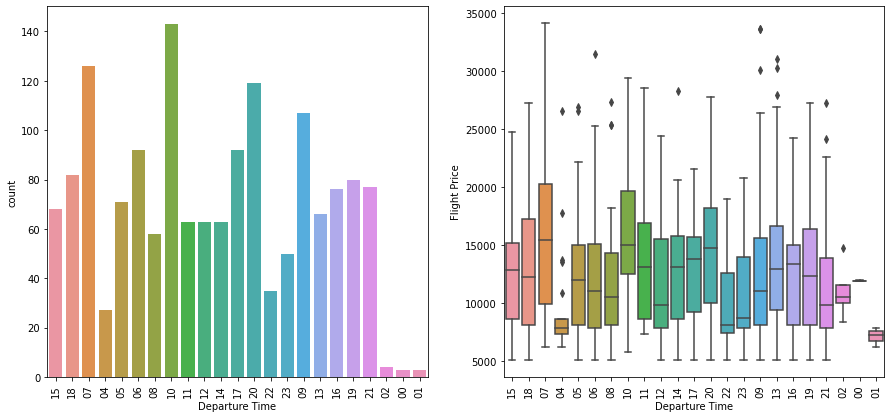

In [30]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(price['Departure Time'])
plt.xlabel('Departure Time')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'Departure Time', y= 'Flight Price', data= price)
plt.xlabel('Departure Time')
plt.xticks(rotation= 90)
plt.ylabel('Flight Price')
plt.show()

4. Destination

In [31]:
price['Destination'].unique()

array(['Mumbai', 'Bangalore', 'Chennai', 'Hyderabad', 'New Delhi'],
      dtype=object)

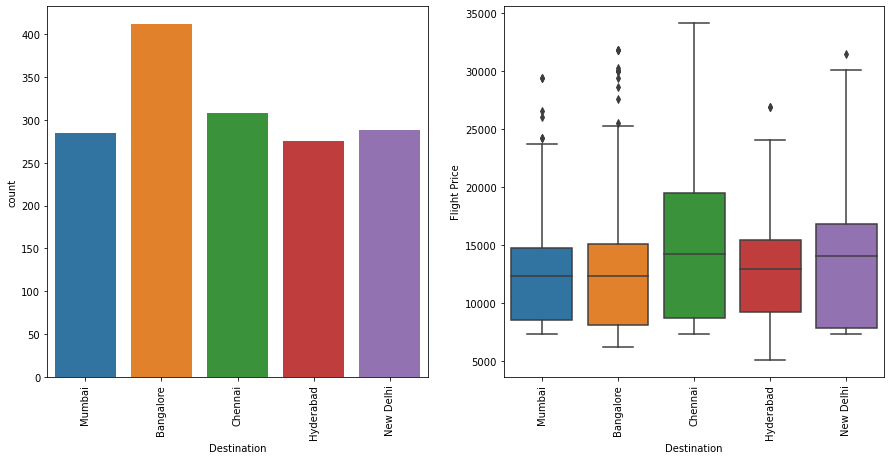

In [32]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(price['Destination'])
plt.xlabel('Destination')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'Destination', y= 'Flight Price', data= price)
plt.xlabel('Destination')
plt.xticks(rotation= 90)
plt.ylabel('Flight Price')
plt.show()

5. Arrival Time

In [33]:
price['Arrival Time'].unique()

array(['17:00', '20:00', '09:05', '06:35', '07:55', '08:40', '09:10',
       '09:25', '10:10', '10:20', '12:50', '13:25', '14:10', '15:00',
       '16:30', '17:40', '19:25', '20:50', '21:05', '22:10',
       '00:40\n+ 1 day', '01:45\n+ 1 day', '09:20', '11:15', '12:35',
       '15:15', '16:35', '18:15', '21:15', '23:00', '23:15', '23:30',
       '11:10', '13:05', '14:00', '19:05', '20:05', '22:05', '07:10',
       '12:00', '02:00\n+ 1 day', '14:35', '22:15', '00:35\n+ 1 day',
       '02:25\n+ 1 day', '18:20', '14:45', '07:15\n+ 1 day',
       '07:40\n+ 1 day', '17:30\n+ 1 day', '11:35', '23:55', '22:00',
       '22:50', '09:45', '23:25', '05:55\n+ 1 day', '13:15', '18:50',
       '17:50', '07:05\n+ 1 day', '08:25\n+ 1 day', '23:05', '12:25',
       '08:15\n+ 1 day', '19:40', '10:35\n+ 1 day', '17:55', '22:25',
       '11:30\n+ 1 day', '16:25', '15:50', '15:50\n+ 1 day',
       '15:15\n+ 1 day', '10:55', '16:05', '08:20\n+ 1 day',
       '00:10\n+ 1 day', '10:00\n+ 1 day', '14:30', '19:

In [38]:
price['Arrival Time'] = price['Arrival Time'].str.replace('1 day','')

In [40]:
a = []
for i in price['Arrival Time']:
    i = i[:2]
    a.append(i)

In [42]:
price['Arrival Time'] = pd.Series(a)

In [43]:
price['Arrival Time'].unique()

array(['17', '20', '09', '06', '07', '08', '10', '12', '13', '14', '15',
       '16', '19', '21', '22', '00', '01', '11', '18', '23', '02', '05',
       '03', '04'], dtype=object)

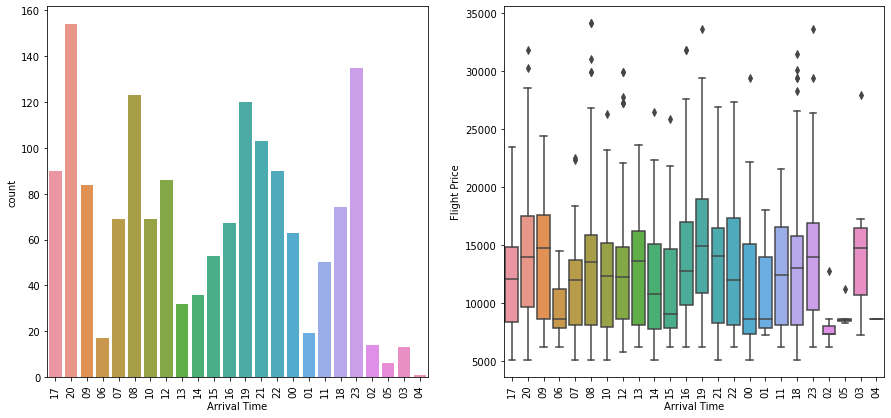

In [44]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(price['Arrival Time'])
plt.xlabel('Arrival Time')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'Arrival Time', y= 'Flight Price', data= price)
plt.xlabel('Arrival Time')
plt.xticks(rotation= 90)
plt.ylabel('Flight Price')
plt.show()

6. Stops

In [45]:
price['Stops'].unique()

array(['Non Stop', '1 Stop', '3 Stop(s)', '2 Stop(s)'], dtype=object)

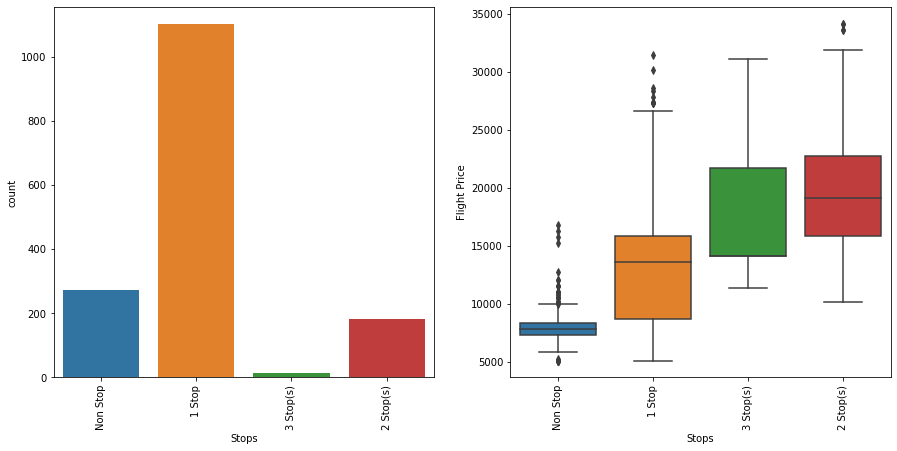

In [46]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(price['Stops'])
plt.xlabel('Stops')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'Stops', y= 'Flight Price', data= price)
plt.xlabel('Stops')
plt.xticks(rotation= 90)
plt.ylabel('Flight Price')
plt.show()

7. Duration

In [47]:
price['Duration'].unique()

array(['2h 00m', '2h 05m', '2h 10m', '2h 15m', '2h 20m', '2h 25m',
       '2h 30m', '4h 00m', '4h 05m', '4h 25m', '5h 35m', '5h 50m',
       '6h 25m', '6h 35m', '7h 15m', '7h 30m', '8h 10m', '8h 45m',
       '10h 30m', '11h 40m', '12h 15m', '13h 15m', '13h 45m', '14h 05m',
       '25h 45m', '4h 55m', '10h 20m', '7h 40m', '9h 35m', '4h 10m',
       '17h 30m', '8h 20m', '4h 35m', '9h 45m', '10h 10m', '17h 10m',
       '10h 25m', '9h 40m', '15h 15m', '3h 50m', '18h 20m', '21h 40m',
       '3h 55m', '5h 20m', '20h 50m', '25h 35m', '5h 25m', '5h 40m',
       '8h 40m', '10h 15m', '21h 25m', '23h 35m', '7h 00m', '19h 15m',
       '26h 30m', '6h 00m', '8h 00m', '12h 35m', '20h 10m', '23h 45m',
       '24h 50m', '8h 15m', '15h 30m', '10h 00m', '19h 25m', '4h 50m',
       '5h 45m', '7h 20m', '11h 20m', '11h 35m', '14h 55m', '15h 55m',
       '16h 10m', '23h 05m', '26h 25m', '7h 45m', '5h 30m', '16h 20m',
       '7h 35m', '15h 10m', '14h 20m', '14h 50m', '13h 25m', '12h 45m',
       '6h 20m', '17

In [48]:
a = []
for i in price['Duration']:
    i = i[:2]
    a.append(i)

In [50]:
price['Duration'] = pd.Series(a)

In [51]:
price['Duration'].unique()

array(['2h', '4h', '5h', '6h', '7h', '8h', '10', '11', '12', '13', '14',
       '25', '9h', '17', '15', '3h', '18', '21', '20', '23', '19', '26',
       '24', '16', '22', '33', '27', '29', '41', '31', '1h', '28', '36',
       '32', '34', '35'], dtype=object)

In [52]:
price['Duration'] = price['Duration'].str.replace('h','')

In [53]:
price['Duration'].unique()

array(['2', '4', '5', '6', '7', '8', '10', '11', '12', '13', '14', '25',
       '9', '17', '15', '3', '18', '21', '20', '23', '19', '26', '24',
       '16', '22', '33', '27', '29', '41', '31', '1', '28', '36', '32',
       '34', '35'], dtype=object)

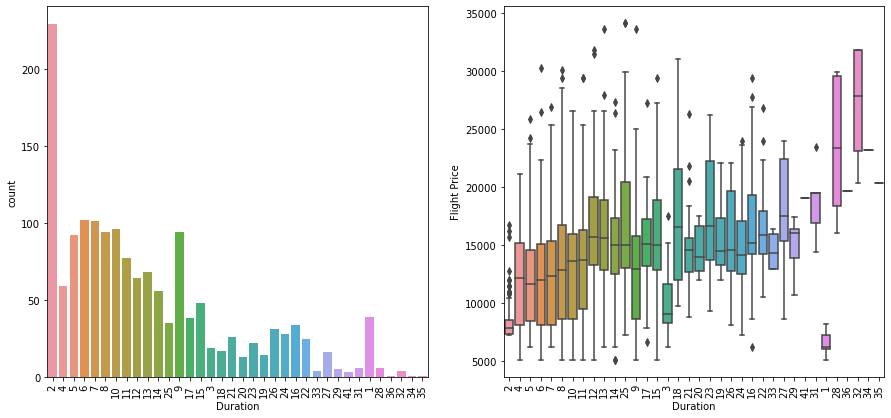

In [54]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(price['Duration'])
plt.xlabel('Duration')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'Duration', y= 'Flight Price', data= price)
plt.xlabel('Duration')
plt.xticks(rotation= 90)
plt.ylabel('Flight Price')
plt.show()

In [55]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline Name    1568 non-null   object
 1   Source          1568 non-null   object
 2   Departure Time  1568 non-null   object
 3   Destination     1568 non-null   object
 4   Arrival Time    1568 non-null   object
 5   Stops           1568 non-null   object
 6   Duration        1568 non-null   object
 7   Flight Price    1568 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 98.1+ KB


In [56]:
price['Airline Name'].unique()

array(['Go First', 'Air India', 'Air Asia', 'Vistara', 'IndiGo',
       'SpiceJet'], dtype=object)

In [57]:
price['Airline Name'] = price['Airline Name'].replace(['Go First', 'Air India', 'Air Asia', 'Vistara', 'IndiGo',
                                                       'SpiceJet'],[0,1,2,3,4,5])

In [58]:
price['Source'].unique()

array(['New Delhi', 'Mumbai', 'Kolkata'], dtype=object)

In [59]:
price['Source'] = price['Source'].replace(['New Delhi', 'Mumbai', 'Kolkata'],[0,1,2])

In [60]:
price['Departure Time'].unique()

array(['15', '18', '07', '04', '05', '06', '08', '10', '11', '12', '14',
       '17', '20', '22', '23', '09', '13', '16', '19', '21', '02', '00',
       '01'], dtype=object)

In [61]:
price['Departure Time'] = pd.to_numeric(price['Departure Time'])

In [62]:
price['Destination'].unique()

array(['Mumbai', 'Bangalore', 'Chennai', 'Hyderabad', 'New Delhi'],
      dtype=object)

In [63]:
price['Destination'] = price['Destination'].replace(['Mumbai', 'Bangalore', 'Chennai', 'Hyderabad', 'New Delhi'],[0,1,2,3,4])

In [64]:
price['Arrival Time'].unique()

array(['17', '20', '09', '06', '07', '08', '10', '12', '13', '14', '15',
       '16', '19', '21', '22', '00', '01', '11', '18', '23', '02', '05',
       '03', '04'], dtype=object)

In [65]:
price['Arrival Time'] = pd.to_numeric(price['Arrival Time'])

In [66]:
price['Stops'].unique()

array(['Non Stop', '1 Stop', '3 Stop(s)', '2 Stop(s)'], dtype=object)

In [67]:
price['Stops'] = price['Stops'].replace(['Non Stop', '1 Stop', '3 Stop(s)', '2 Stop(s)'],
                                        [0,1,2,3])

In [68]:
price['Duration'].unique()

array(['2', '4', '5', '6', '7', '8', '10', '11', '12', '13', '14', '25',
       '9', '17', '15', '3', '18', '21', '20', '23', '19', '26', '24',
       '16', '22', '33', '27', '29', '41', '31', '1', '28', '36', '32',
       '34', '35'], dtype=object)

In [69]:
price['Duration'] = pd.to_numeric(price['Duration'])

In [70]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Airline Name    1568 non-null   int64
 1   Source          1568 non-null   int64
 2   Departure Time  1568 non-null   int64
 3   Destination     1568 non-null   int64
 4   Arrival Time    1568 non-null   int64
 5   Stops           1568 non-null   int64
 6   Duration        1568 non-null   int64
 7   Flight Price    1568 non-null   int64
dtypes: int64(8)
memory usage: 98.1 KB


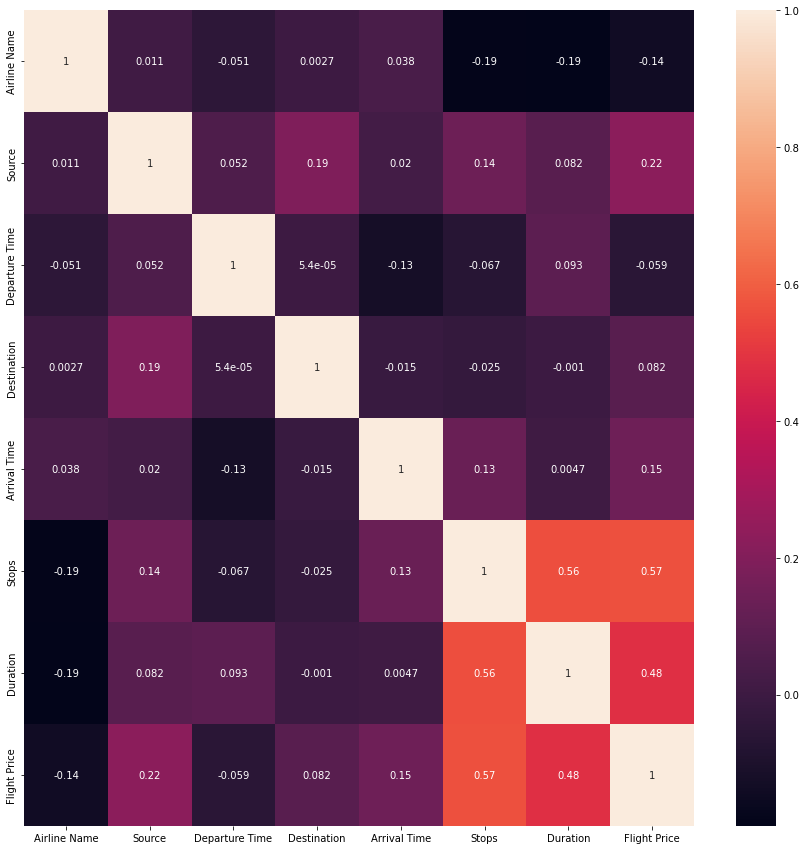

In [71]:
plt.figure(figsize= [15,15])
sns.heatmap(price.corr(), annot= True)
plt.show()

In [72]:
price.drop(['Destination'], axis= 1, inplace= True)

In [73]:
X = price.drop(['Flight Price'], axis= 1)
y = price['Flight Price']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 147)

In [77]:
scaler = StandardScaler()

In [78]:
scaledX_train = scaler.fit_transform(X_train)
scaledX_test = scaler.transform(X_test)

In [79]:
lr = LinearRegression()
lrf = GridSearchCV(lr, param_grid= {'n_jobs': [1,2,3,4,5]}, scoring= 'r2', cv= 5)

In [80]:
lrf.fit(scaledX_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'n_jobs': [1, 2, 3, 4, 5]}, scoring='r2')

In [81]:
lrf.best_params_

{'n_jobs': 1}

In [82]:
print('Train score : ', lrf.score(scaledX_train, y_train))
print('Test score : ', lrf.score(scaledX_test, y_test))

Train score :  0.3710369570558937
Test score :  0.4662297420306434


In [83]:
dt = DecisionTreeRegressor()
dtf = GridSearchCV(dt, param_grid= {'max_depth': [1,2,3,4,5], 'min_samples_split': [1,2,3,4,5], 'min_samples_leaf': [1,2,3,4,5]},
                   scoring= 'r2', cv= 5)

In [84]:
dtf.fit(scaledX_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5]},
             scoring='r2')

In [85]:
dtf.best_params_

{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 4}

In [86]:
print('Train score : ', dtf.score(scaledX_train, y_train))
print('Test score : ', dtf.score(scaledX_test, y_test))

Train score :  0.5249064586489647
Test score :  0.543597920624536


In [87]:
rf = RandomForestRegressor()
rff = GridSearchCV(rf, param_grid= {'max_depth': [1,2,3,4,5], 'min_samples_split': [1,2,3,4,5], 'min_samples_leaf': [1,2,3,4,5]},
                   scoring= 'r2', cv= 5)

In [88]:
rff.fit(scaledX_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5]},
             scoring='r2')

In [89]:
rff.best_params_

{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}

In [90]:
print('Train score : ', rff.score(scaledX_train, y_train))
print('Test score : ', rff.score(scaledX_test, y_test))

Train score :  0.5693096050656798
Test score :  0.6013559121284408


In [91]:
br = BaggingRegressor()
brf = GridSearchCV(br, param_grid= {'n_estimators': [10,20,30,40,50], 'max_features': [1,2,3,4,5], 'max_samples': [1,2,3,4,5]},
                   scoring= 'r2', cv= 5)

In [92]:
brf.fit(scaledX_train, y_train)

GridSearchCV(cv=5, estimator=BaggingRegressor(),
             param_grid={'max_features': [1, 2, 3, 4, 5],
                         'max_samples': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='r2')

In [93]:
brf.best_params_

{'max_features': 5, 'max_samples': 5, 'n_estimators': 50}

In [94]:
print('Train score : ', brf.score(scaledX_train, y_train))
print('Test score : ', brf.score(scaledX_test, y_test))

Train score :  0.16106285915249108
Test score :  0.1714692640242792


In [95]:
ad = AdaBoostRegressor(base_estimator= DecisionTreeRegressor())
adf = GridSearchCV(ad, param_grid= {'n_estimators': [10,20,30,40,50], 'learning_rate': [1,0.1,0.01,0.245,0.35678]},
                   scoring= 'r2', cv= 5)

In [96]:
adf.fit(scaledX_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor()),
             param_grid={'learning_rate': [1, 0.1, 0.01, 0.245, 0.35678],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='r2')

In [97]:
adf.best_params_

{'learning_rate': 1, 'n_estimators': 40}

In [98]:
print('Train score : ', adf.score(scaledX_train, y_train))
print('Test score : ', adf.score(scaledX_test, y_test))

Train score :  0.9377899513123458
Test score :  0.5296415546617945


In [99]:
gd = GradientBoostingRegressor()
gdf = GridSearchCV(gd, param_grid= {'learning_rate': [0.1,0.2,0.01,0.02345,0.34], 'max_depth': [1,2,3,4,5], 'min_samples_leaf': [1,2,3,4,5]},
                   scoring= 'r2', cv= 5)

In [100]:
gdf.fit(scaledX_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.2, 0.01, 0.02345, 0.34],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5]},
             scoring='r2')

In [101]:
gdf.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 3}

In [102]:
print('Train score : ', gdf.score(scaledX_train, y_train))
print('Test score : ', gdf.score(scaledX_test, y_test))

Train score :  0.7237270903133821
Test score :  0.6912836388427025


In [103]:
sv = SVR()
svf = GridSearchCV(sv, param_grid= {'kernel': ['linear','rbf'], 'C': [1,2,3,4,5]},
                   scoring= 'r2', cv= 5)

In [104]:
svf.fit(scaledX_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 2, 3, 4, 5], 'kernel': ['linear', 'rbf']},
             scoring='r2')

In [105]:
svf.best_params_

{'C': 5, 'kernel': 'linear'}

In [106]:
print('Train score : ', svf.score(scaledX_train, y_train))
print('Test score : ', svf.score(scaledX_test, y_test))

Train score :  0.3319377072098867
Test score :  0.3978401484165168


In [107]:
gd = GradientBoostingRegressor(learning_rate= 0.1, max_depth= 4, min_samples_leaf= 3)

In [108]:
pred = gd.fit(scaledX_train, y_train).predict(scaledX_test)

In [113]:
df = pd.DataFrame({'Actual': y_test, 'Prediction': np.round(pred,0)})
df.head()

,Actual,Prediction
1378,24602,12778.0
792,16233,15155.0
1504,9954,11721.0
1226,16677,16870.0
560,7308,11140.0


In [114]:
print('r2 score : ', metrics.r2_score(y_test, pred))

r2 score :  0.6912463458504768


In [115]:
print('rmse score : ', np.sqrt(metrics.mean_squared_error(y_test, pred)))

rmse score :  3068.4838714927428


In [116]:
print('mae score : ', metrics.mean_absolute_error(y_test, pred))

mae score :  2206.9907870191632


In [117]:
save_gd = pickle.dumps(gd)